# Import libraries

In [1]:
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

# Read shapefile

The database of faults was cloned through GitHub, with repository available from https://github.com/cossatot/gem-global-active-faults.git.

<AxesSubplot:>

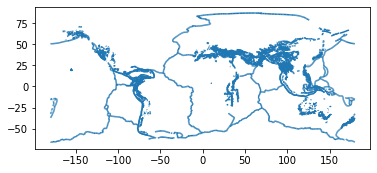

In [2]:
# See all faults and visualize
fault = gpd.read_file('/home/msds2022/mgaspar/cpt5/gem-global-active-faults/'\
                      'shapefile/gem_active_faults.shp')
fault.plot()

<AxesSubplot:>

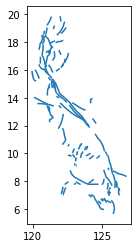

In [3]:
# Limit search to PH only and visualize
fault_ph = fault.loc[fault['catalog_na'] == 'philippines']
fault_ph.plot()

In [4]:
fault_ph

,WKT_GEOMET,accuracy,activity_c,average_di,average_ra,catalog_id,catalog_na,dip_dir,downthrown,downthro_1,...,net_slip_r,notes,ogc_fid,reference,shortening,slip_type,strike_sli,upper_seis,vert_sep_r,geometry
8647,None,None,None,None,None,PHL_0,philippines,None,None,None,...,None,None,None,None,None,Sinistral,None,None,None,"LINESTRING (125.57053 7.42785, 125.51403 7.52689)"
8648,None,None,None,None,None,PHL_1,philippines,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (125.57053 7.42785, 125.51403 7.52689)"
8649,None,None,None,None,None,PHL_2,philippines,None,None,None,...,None,None,None,None,None,Sinistral,None,None,None,"LINESTRING (125.43461 7.24751, 125.43475 7.242..."
8650,None,None,None,"(35,,)",None,PHL_3,philippines,W,E,None,...,"(2.0, 1.0, 3.0)",None,None,None,None,Reverse,None,None,None,"LINESTRING (123.95382 10.52186, 123.95131 10.5..."
8651,None,None,None,"(35,,)",None,PHL_4,philippines,W,E,None,...,"(2.0, 1.0, 3.0)",None,None,None,None,Reverse,None,None,None,"LINESTRING (123.49640 10.72408, 123.49603 10.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,None,None,None,"(35.,,)",None,PHL_111,philippines,N,S,None,...,"(1.0, 0.5, 1.5)",None,None,None,None,Reverse,None,None,None,"LINESTRING (124.82046 9.84095, 124.57672 9.62971)"
8759,None,None,None,None,None,PHL_112,philippines,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (121.01255 19.20139, 121.19679 19.5..."
8760,None,None,None,"(25.,,)",None,PHL_113,philippines,W,E,None,...,"(7.0, 3.5, 10.5)",None,None,None,None,Reverse,None,None,None,"LINESTRING (125.63148 6.60241, 125.68041 6.563..."
8761,None,None,None,None,None,PHL_114,philippines,W,E,None,...,None,None,None,None,"(5.0, 2.5, 7.5)",Reverse,None,None,None,"LINESTRING (121.71960 18.50098, 121.92755 18.7..."


# Connect to existing PH shapefile from AIM

In [5]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [6]:
ph_shp = gpd.read_postgis('''
SELECT *
FROM gadm.ph
''', conn)

# Plotting both

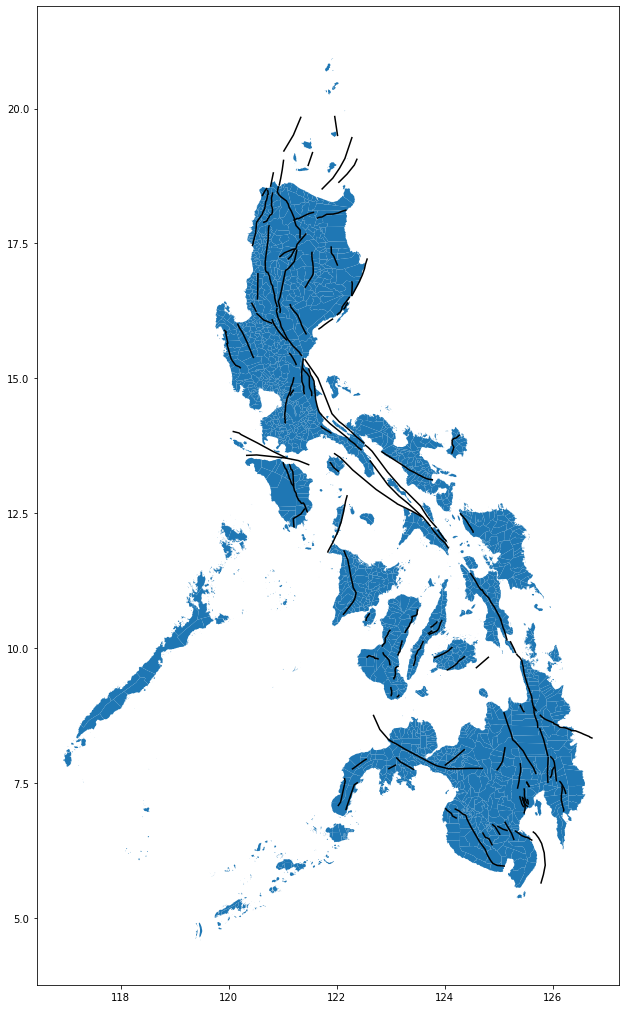

In [10]:
ax = ph_shp.plot(figsize=(15,18))
fault_ph.plot(ax=ax, color='black', edgecolor='black')
plt.show()

In [8]:
fault_ph.shape

(116, 27)